# GROUP-2

## Members
#### 1.Nyarko Rudolf-11297285
#### 2.Mensah Erskine - 11293368
#### 3.Jacob Kofi Ababio Agyemang-Prempeh- 11136489
#### 4.Johnson Saka - 11037486
#### 5.Kuuku Ampah - 11259806
#### 6.Theoford Nana Gyanfosu - 11303292
#### 7.Osafo Jayden John Boamah-11252890
#### 8.Beatrice Sophia Nhyira Yawson- 11151818
#### 9.Ama Addae Montford - 11034645
#### 10.Obed Sarkodie - 11041617


## **1.What is Modular Exponentiation?**
Modular exponentiation is a method used to compute expressions of the form:
  
\[
b^e \mod m
\]

This means we raise a base \(b\) to an exponent \(e\) and then find the remainder when divided by \(m\). This method is useful in cryptography and number theory.


**function**

In [55]:
import time

In [56]:
start_time = time.time()

def modular_exponentiation(base , exponent , mod):
  result = 1
  base = base % mod # if the base is large

  while exponent > 0:
        if exponent % 2 == 1:
            result = (result * base) % mod
        exponent = exponent // 2
        base = (base * base) % mod

  return result


### Testing the Function
We tested our function with \( 3^{644} \mod 645 \) as discussed in class, and it returned the expected output.


In [57]:
modular_exponentiation(3, 644, 645)


36

### Direct Computation
We calculated \( 7^{121} \) and then applied modulo 13. However, this method is inefficient because large numbers can slow down computations.


In [58]:
large_number = 7**121
mod_result = large_number % 13
mod_result


7

### Using Modular Exponentiation Function
This method is more efficient as it reduces large computations step by step.


In [59]:
modular_exponentiation(7, 121, 13)


7

### Using Python’s Built-in pow() Function
Python provides a built-in function `pow(base, exponent, modulus)`, which is optimized for fast computation.


In [60]:
pow(7, 121, 13)  


7

### Comparing Execution Times
We measured the time taken by each method:
- **Direct computation**: Very slow due to large number operations.
- **Modular exponentiation function**: Faster and more efficient.
- **Python’s built-in pow()**: The fastest method, as it is optimized internally.



#### Direct computation

In [61]:
start_time = time.time()
large_number = 7 ** 121  # Compute 7^121 directly
result1 = large_number % 13  # Take modulo 13
end_time = time.time()
print(f"Method 1 Result: {result1}, Time: {end_time - start_time} seconds")

Method 1 Result: 7, Time: 0.0 seconds



##### Modular exponentiation function

In [62]:
result2_start_time = time.time()
result2 = modular_exponentiation(7, 121, 13)  # Use the custom function
result2_end_time = time.time()
print(f"Method 2 Result: {result2}, Time: {result2_end_time - result2_start_time} seconds")

Method 2 Result: 7, Time: 0.0 seconds


#### Built-in pow() function

In [63]:

start_time = time.time()
result3 = pow(7, 121, 13)  # Use Python's built-in pow function
end_time = time.time()
print(f"Method 3 Result: {result3}, Time: {end_time - start_time} seconds")

Method 3 Result: 7, Time: 0.000997304916381836 seconds


## Conclusion
From our experiment, we observed that:
1. **Direct computation** is the slowest method due to extremely large numbers.
2. **The modular exponentiation function** is significantly faster, as it reduces the problem step by step.
3. **Python’s built-in pow() function** is the fastest method since it is optimized for modular exponentiation.

Thus, for practical applications, using either the modular exponentiation function or Python’s built-in pow() function is recommended.


## **2.Brute Force Factorization of n to find 'p' and 'q'**

### Importing Libraries needed

In [9]:
import time
import sympy
import matplotlib.pyplot as plt
import numpy as np

**function**

In [10]:
def brute_force_factorization(n):
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return i, n // i
            return None, None

**Computing the modular inverse of e modulo phi**

In [11]:
def compute_d(e, phi):
    return pow(e, -1, phi)

**Measuring the time taken to factor pq and compute d**

In [12]:
def measure_rsa_decryption_time(p, q, e):
    n = p * q
    phi = (p - 1) * (q - 1)

    start_factor = time.time()
    p_factored, q_factored = brute_force_factorization(n)
    end_factor = time.time()

    if p_factored is None or q_factored is None:
        raise ValueError("Factorization failed")

    start_d = time.time()
    d = compute_d(e, phi)
    end_d = time.time()

    return end_factor - start_factor, end_d - start_d 

**Compute decryption key d for given p, q, and e**

In [13]:
p_given, q_given, e_given = 43, 59, 13
n_given = p_given * q_given
phi_given = (p_given - 1) * (q_given - 1)

start_d_given = time.time()
d_given = compute_d(e_given, phi_given)
end_d_given = time.time()

time_taken_given = end_d_given - start_d_given
print(f"Given p={p_given}, q={q_given}, e={e_given}")
print(f"Computed d = {d_given}")
print(f"Time taken to compute d: {time_taken_given:.6f} sec\n")

Given p=43, q=59, e=13
Computed d = 937
Time taken to compute d: 0.000000 sec



**Selecting Prime Numbers**

In [14]:
prime_sizes = [4, 6, 8, 10]
factor_times = []
d_times = []
n_values = []
e = sympy.prime(100)

for size in prime_sizes:
    p = sympy.randprime(10**(size-1), 10**size)
    q = sympy.randprime(10**(size-1), 10**size)
    n = p * q
    factor_time, d_time = measure_rsa_decryption_time(p, q, e)
    factor_times.append(factor_time)
    d_times.append(d_time)
    n_values.append(n)

In [15]:
print("\nFinal Results:")
for i, size in enumerate(prime_sizes):
    print(f"Prime size: {size} digits - Factorization Time: {factor_times[i]:.6f} sec, d Computation Time: {d_times[i]:.6f} sec")


Final Results:
Prime size: 4 digits - Factorization Time: 0.000995 sec, d Computation Time: 0.000000 sec
Prime size: 6 digits - Factorization Time: 0.056292 sec, d Computation Time: 0.000000 sec
Prime size: 8 digits - Factorization Time: 12.664568 sec, d Computation Time: 0.000000 sec
Prime size: 10 digits - Factorization Time: 850.689197 sec, d Computation Time: 0.000000 sec


#### Graph

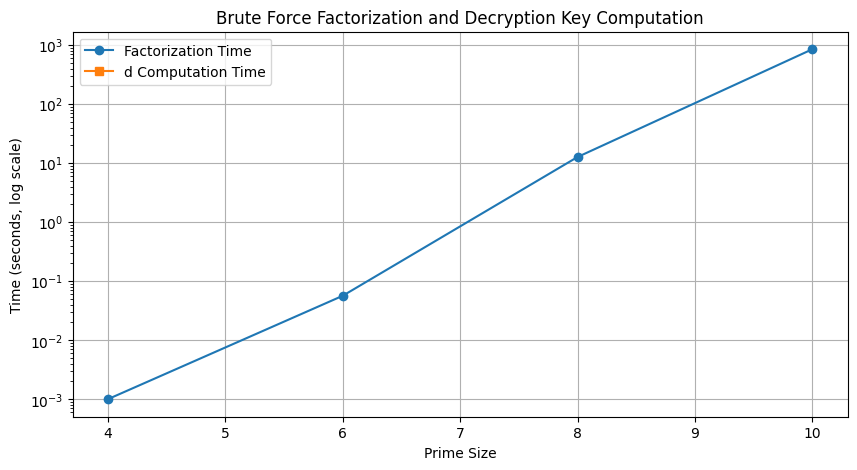

In [16]:
# Plot results
plt.figure(figsize=(10, 5))
plt.yscale('log')  # Log scale due to large differences
plt.plot(prime_sizes, factor_times, marker='o', label='Factorization Time')
plt.plot(prime_sizes, d_times, marker='s', label='d Computation Time')
plt.xlabel('Prime Size')
plt.ylabel('Time (seconds, log scale)')
plt.title('Brute Force Factorization and Decryption Key Computation')
plt.legend()
plt.grid(True)
plt.show()

## **3.Brute-Force Password Cracking Simulation**

This notebook illustrates the process of brute-force password cracking by simulating attempts to discover various password types:

*   4-digit numeric codes
*   6-digit numeric codes
*   4-character alphanumeric passwords (case-sensitive)
*   6-character alphanumeric passwords (case-sensitive)

**For each scenario, we will:**

*  Outline the methodology.
*  Provide the Python code.
*  Execute tests on 500 randomly generated codes.
*  Visualize the distribution of cracking durations.

### Importing Libraries needed

In [1]:
import random
import time
import matplotlib.pyplot as plt
import itertools
import string

%matplotlib inline

### 4-Digit PIN Brute-Force Cracking

- The brute-force cracking of a 4-digit PIN is demonstrated by iterating through all 10,000 possibilities ("0000" to "9999").
- The time taken to discover the correct PIN is recorded.

#### This algorithm sequentially generates every 4-digit code from "0000" to "9999" and checks it against the target.


In [2]:
def crack_four_digit_pin(target_pin: str) -> float:
  
    time_start = time.perf_counter()
    for num in range(10000):  # From 0000 to 9999
        guess_code = str(num).zfill(4)
        if guess_code == target_pin:
            break
    time_finish = time.perf_counter()
    return time_finish - time_start




#### Quick test with a known PIN:


In [3]:
sample_pin = "234"
print(f"Time to crack {sample_pin}: {crack_four_digit_pin(sample_pin):.6f} seconds")

Time to crack 234: 0.004635 seconds


In [4]:
sample_pin = "5234"
print(f"Time to crack {sample_pin}: {crack_four_digit_pin(sample_pin):.6f} seconds")

Time to crack 5234: 0.002415 seconds


#### Task: Generate 500 random 4-digit PINs and record the cracking times

In [5]:
# Generate 500 random 4-digit PINs and record the cracking times
time_results_pin4 = []
random_pin_list = [str(random.randint(0, 9999)).zfill(4) for _ in range(500)]

for pin_code in random_pin_list:
    duration = crack_four_digit_pin(pin_code)
    time_results_pin4.append(duration)




#### Graph

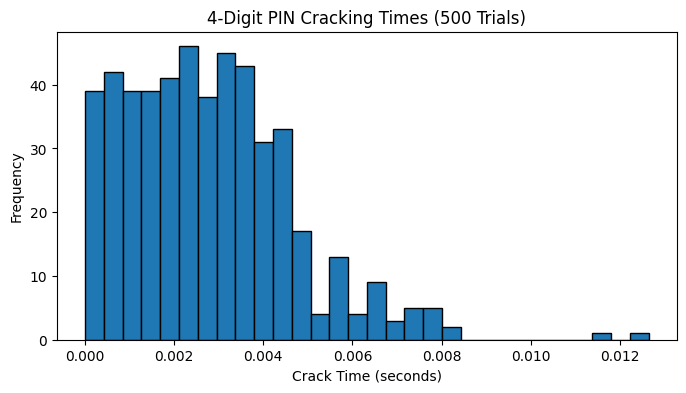

In [6]:

plt.figure(figsize=(8, 4))
plt.hist(time_results_pin4, bins=30, edgecolor='black')
plt.xlabel("Crack Time (seconds)")
plt.ylabel("Frequency")
plt.title("4-Digit PIN Cracking Times (500 Trials)")
plt.show()

### 6-Digit PIN Brute-Force Cracking
- This algorithm exhaustively searches all 6-digit codes within the range "000000" to "999999".

In [7]:
def crack_six_digit_pin(target_code: str) -> float:
  
    start_moment = time.perf_counter()
    for num in range(1000000):  # From 000000 to 999999
        code_guess = str(num).zfill(6)
        if code_guess == target_code:
            break
    end_moment = time.perf_counter()
    return end_moment - start_moment




##### Quick test

In [8]:

sample_pin6 = "654321"
print(f"Time to crack {sample_pin6}: {crack_six_digit_pin(sample_pin6):.6f} seconds")

Time to crack 654321: 0.391168 seconds


### Task

- **Generate 500 random 6-digit PINs and measure brute-force cracking times.**
- **Plot the distribution of cracking times.**

In [9]:
time_results_pin6 = []
random_pin6_list = [str(random.randint(0, 999999)).zfill(6) for _ in range(500)]

for pin_code in random_pin6_list:
    duration = crack_six_digit_pin(pin_code)
    time_results_pin6.append(duration)

#### Graph

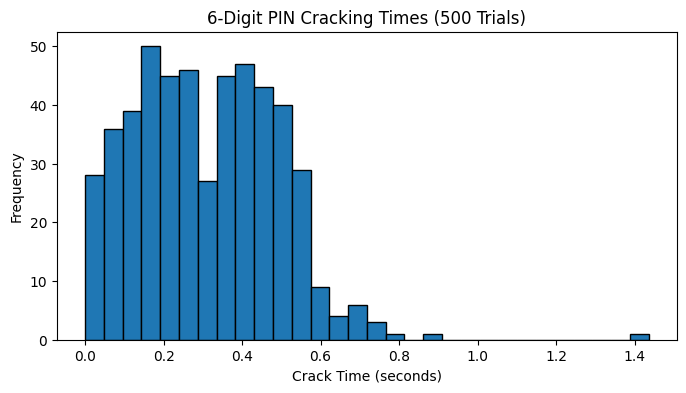

In [10]:
plt.figure(figsize=(8, 4))
plt.hist(time_results_pin6, bins=30, edgecolor='black')
plt.xlabel("Crack Time (seconds)")
plt.ylabel("Frequency")
plt.title("6-Digit PIN Cracking Times (500 Trials)")
plt.show()

###  4-Character Alphanumeric Brute-Force Cracking

- This generates every possible 4-character string using a 62-character set (26 uppercase + 26 lowercase + 10 digits).


In [11]:
def crack_alpha4(target_str: str) -> float:
    
    charset = string.ascii_letters + string.digits
    initial_time = time.perf_counter()
    for combo in itertools.product(charset, repeat=4):
        guess_str = ''.join(combo)
        if guess_str == target_str:
            break
    final_time = time.perf_counter()
    return final_time - initial_time




##### Quick test with a known alphanumeric code:


In [12]:
sample_alpha4 = "aB3d"
print(f"Time to crack {sample_alpha4}: {crack_alpha4(sample_alpha4):.6f} seconds")

Time to crack aB3d: 0.049565 seconds


### Task:
- **Function to generate a random alphanumeric code of a given length**

In [13]:
def gen_random_alpha_code(length: int) -> str:
    charset = string.ascii_letters + string.digits
    return ''.join(random.choice(charset) for _ in range(length))

# Generate 500 random 4-character alphanumeric codes and record the times
time_results_alpha4 = []
random_alpha4_list = [gen_random_alpha_code(4) for _ in range(500)]

for code_str in random_alpha4_list:
    duration = crack_alpha4(code_str)
    time_results_alpha4.append(duration)

#### Graph

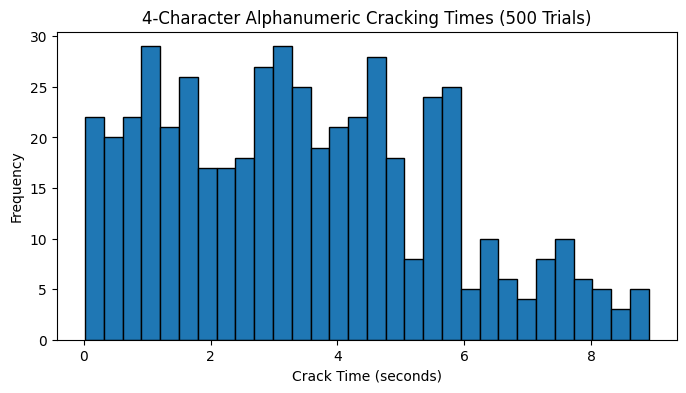

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(time_results_alpha4, bins=30, edgecolor='black')
plt.xlabel("Crack Time (seconds)")
plt.ylabel("Frequency")
plt.title("4-Character Alphanumeric Cracking Times (500 Trials)")
plt.show()

### 6-Character Alphanumeric Brute-Force Cracking

- Because the search space (62^6) is enormous, we include a maximum number of trials (max_trials)
to prevent excessive computation during demonstration.


In [15]:
def crack_alpha6(target_str: str, max_trials: int = 1000000) -> float:

    charset = string.ascii_letters + string.digits
    start_instant = time.perf_counter()
    trial_count = 0
    for combo in itertools.product(charset, repeat=6):
        trial_count += 1
        guess_str = ''.join(combo)
        if guess_str == target_str or trial_count >= max_trials:
            break
    end_instant = time.perf_counter()
    return end_instant - start_instant




##### Quick test with a sample alphanumeric 6-character code (using the trial cap):


In [16]:
sample_alpha6 = "Ab3dE1"
print(f"Time to crack (attempt) {sample_alpha6}: {crack_alpha6(sample_alpha6):.6f} seconds")

Time to crack (attempt) Ab3dE1: 1.025132 seconds


### Task: 
-  Generate 500 random 6-character alphanumeric codes and record the cracking times (with cap)

In [17]:
time_results_alpha6 = []
random_alpha6_list = [gen_random_alpha_code(6) for _ in range(500)]

for code_str in random_alpha6_list:
    duration = crack_alpha6(code_str, max_trials=1000000)
    time_results_alpha6.append(duration)


#### Graph

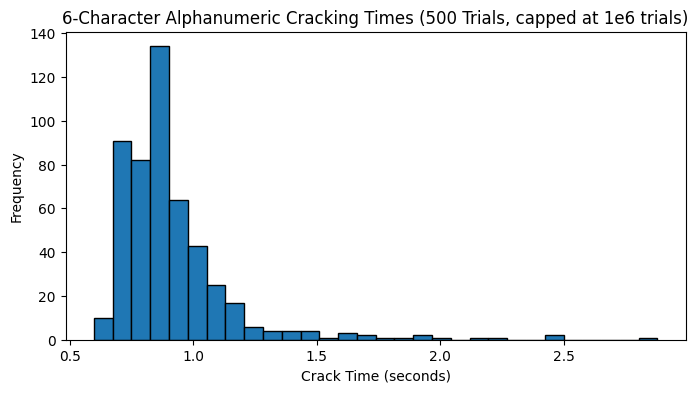

In [18]:

plt.figure(figsize=(8, 4))
plt.hist(time_results_alpha6, bins=30, edgecolor='black')
plt.xlabel("Crack Time (seconds)")
plt.ylabel("Frequency")
plt.title("6-Character Alphanumeric Cracking Times (500 Trials, capped at 1e6 trials)")
plt.show()

## Conclusion

**This study examined the computational cost of brute-force cracking for various code types:**
- 4-digit PINs **(10,000 possibilities)** 
- 6-digit PINs **(1,000,000 possibilities)** 
- 4-character alphanumeric codes **(14.7 million combinations)** 
- 6-character alphanumeric codes **(capped search of 62^6 possibilities)**. 
                                  
**As expected, search time increased dramatically with the search space size, highlighting the vulnerability of simple codes to brute-force attacks.
 These results emphasize the need for strong passwords and robust cryptographic practices.**
